In [1]:
import pandas as pd
import numpy as np
import pyfpgrowth
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('./data/Groceries_dataset.csv');

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
unique_items = df['itemDescription'].unique().tolist()

In [5]:
unique_items

['tropical fruit',
 'whole milk',
 'pip fruit',
 'other vegetables',
 'rolls/buns',
 'pot plants',
 'citrus fruit',
 'beef',
 'frankfurter',
 'chicken',
 'butter',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'butter milk',
 'bottled water',
 'yogurt',
 'sausage',
 'brown bread',
 'hamburger meat',
 'root vegetables',
 'pork',
 'pastry',
 'canned beer',
 'berries',
 'coffee',
 'misc. beverages',
 'ham',
 'turkey',
 'curd cheese',
 'red/blush wine',
 'frozen potato products',
 'flour',
 'sugar',
 'frozen meals',
 'herbs',
 'soda',
 'detergent',
 'grapes',
 'processed cheese',
 'fish',
 'sparkling wine',
 'newspapers',
 'curd',
 'pasta',
 'popcorn',
 'finished products',
 'beverages',
 'bottled beer',
 'dessert',
 'dog food',
 'specialty chocolate',
 'condensed milk',
 'cleaner',
 'white wine',
 'meat',
 'ice cream',
 'hard cheese',
 'cream cheese ',
 'liquor',
 'pickled vegetables',
 'liquor (appetizer)',
 'UHT-milk',
 'candy',
 'onions',
 'ha

In [6]:
unique_items.index('butter')

10

In [7]:
df['itemLookup'] = df['itemDescription'].apply(lambda x: unique_items.index(x))

In [8]:
df

,Member_number,Date,itemDescription,itemLookup
0,1808,21-07-2015,tropical fruit,0
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,2
3,1187,12-12-2015,other vegetables,3
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,75
38761,2022,23-02-2014,candy,64
38762,1097,16-04-2014,cake bar,153
38763,1510,03-12-2014,fruit/vegetable juice,11


In [9]:
basket = pd.DataFrame(df.groupby(['Member_number', 'Date'], as_index=True).apply(lambda item: item['itemLookup'].tolist()))

In [10]:
transactions = basket[0].tolist()

In [11]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)

In [12]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [13]:
for key, val in rules.items():
    for k in key:
        print(unique_items[k], '--->', unique_items[val[0][0]], val[1])

bags ---> yogurt 0.75
frankfurter ---> domestic eggs 1.0
rubbing alcohol ---> domestic eggs 1.0
domestic eggs ---> frankfurter 1.0
rubbing alcohol ---> frankfurter 1.0
soda ---> other vegetables 1.0
flower soil/fertilizer ---> other vegetables 1.0
pork ---> curd 2.0
flower soil/fertilizer ---> curd 2.0
curd ---> pork 1.3333333333333333
flower soil/fertilizer ---> pork 1.3333333333333333
other vegetables ---> curd 2.0
pork ---> curd 2.0
flower soil/fertilizer ---> curd 2.0
other vegetables ---> pork 2.0
curd ---> pork 2.0
flower soil/fertilizer ---> pork 2.0
pork ---> other vegetables 1.0
curd ---> other vegetables 1.0
flower soil/fertilizer ---> other vegetables 1.0
frozen vegetables ---> canned beer 1.0
cookware ---> canned beer 1.0
whole milk ---> canned beer 1.0
bottled water ---> canned beer 1.0
cookware ---> canned beer 1.0
whole milk ---> bottled water 1.0
canned beer ---> bottled water 1.0
cookware ---> bottled water 1.0
canned beer ---> bottled water 0.75
cookware ---> bottled 

vinegar ---> whole milk 1.0
softener ---> whole milk 1.0
whole milk ---> softener 1.0
frankfurter ---> softener 1.0
vinegar ---> softener 1.0
whole milk ---> vinegar 1.0
frankfurter ---> vinegar 1.0
softener ---> vinegar 1.0
whole milk ---> frankfurter 1.0
vinegar ---> frankfurter 1.0
softener ---> frankfurter 1.0
frankfurter ---> whole milk 1.0
vinegar ---> whole milk 1.0
softener ---> whole milk 1.0
whole milk ---> root vegetables 1.0
pip fruit ---> root vegetables 1.0
softener ---> root vegetables 1.0
whole milk ---> yogurt 1.0
root vegetables ---> yogurt 1.0
softener ---> yogurt 1.0
pip fruit ---> whole milk 1.0
root vegetables ---> whole milk 1.0
softener ---> whole milk 1.0
whole milk ---> root vegetables 1.0
yogurt ---> root vegetables 1.0
softener ---> root vegetables 1.0
yogurt ---> whole milk 1.0
root vegetables ---> whole milk 1.0
softener ---> whole milk 1.0
other vegetables ---> whole milk 1.0
rolls/buns ---> whole milk 1.0
softener ---> whole milk 1.0
other vegetables ---

IndexError: tuple index out of range

In [14]:
src_dest_wght = {}

for key, val in rules.items():
    if len(key) > 1:
        for k in key:
            if (unique_items[k], unique_items[val[0][0]]) in src_dest_wght:
                print('yes')
                old_val = src_dest_wght[(unique_items[k], unique_items[val[0][0]])]
                src_dest_wght[(unique_items[k], unique_items[val[0][0]])] = old_val if old_val > round(val[1], 2) else round(val[1], 2)
            else:
                print('no')
                src_dest_wght[(unique_items[k], unique_items[val[0][0]])] = round(val[1], 2)
    else:
        print('new')
        src_dest_wght[(unique_items[key[0]], unique_items[val[0][0]])] = round(val[1], 2)
src_dest_wght

new
no
no
no
no
no
no
no
no
no
no
no
yes
yes
no
yes
yes
no
no
yes
no
no
no
no
yes
no
no
no
yes
yes
no
yes
no
no
no
no
no
yes
no
no
no
no
no
no
no
yes
no
yes
yes
yes
yes
yes
yes
no
no
yes
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
no
yes
yes
yes
no
no
no
no
no
no
no
no
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
no
no
no
no
no
no
yes
no
yes
no
no
no
no
no
no
no
no
yes
no
no
no
yes
no
no
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
no
no
no
no
yes
no
no
no
no
no
no
yes
yes
no
no
no
no
yes
no
yes
no
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
yes
yes
yes
no
yes
yes
yes
no
no
no
no
no
yes
yes
no
no
yes
yes
no
yes
no
no
no
no
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
no
no
no
no
no
no
yes
yes
no
no
no
no
no
no
yes
no
no
no
no
yes
yes
no
yes
no
no
no
yes
no
no
no
yes
no
no
no
yes
no
yes
no
yes
yes
yes
yes
no
no
no
no
no
no
yes
no

IndexError: tuple index out of range

In [15]:
src_dest_wght

{('bags', 'yogurt'): 0.75,
 ('frankfurter', 'domestic eggs'): 1.0,
 ('rubbing alcohol', 'domestic eggs'): 1.0,
 ('domestic eggs', 'frankfurter'): 1.0,
 ('rubbing alcohol', 'frankfurter'): 1.0,
 ('soda', 'other vegetables'): 1.0,
 ('flower soil/fertilizer', 'other vegetables'): 1.0,
 ('pork', 'curd'): 2.0,
 ('flower soil/fertilizer', 'curd'): 2.0,
 ('curd', 'pork'): 2.0,
 ('flower soil/fertilizer', 'pork'): 2.0,
 ('other vegetables', 'curd'): 2.0,
 ('other vegetables', 'pork'): 2.0,
 ('pork', 'other vegetables'): 1.0,
 ('curd', 'other vegetables'): 1.0,
 ('frozen vegetables', 'canned beer'): 1.0,
 ('cookware', 'canned beer'): 1.0,
 ('whole milk', 'canned beer'): 1.0,
 ('bottled water', 'canned beer'): 1.0,
 ('whole milk', 'bottled water'): 1.0,
 ('canned beer', 'bottled water'): 1.0,
 ('cookware', 'bottled water'): 1.0,
 ('other vegetables', 'canned beer'): 1.0,
 ('oil', 'whole milk'): 1.0,
 ('cookware', 'whole milk'): 1.0,
 ('chicken', 'other vegetables'): 1.0,
 ('bathroom cleaner', 'o

In [16]:
item_count = df.groupby(by = ['itemDescription']).size().reset_index(name = 'support_count')
item_supp = dict(zip(item_count['itemDescription'], item_count['support_count']))

In [17]:
item_count

,itemDescription,support_count
0,Instant food products,60
1,UHT-milk,323
2,abrasive cleaner,22
3,artif. sweetener,29
4,baby cosmetics,3
...,...,...
162,white bread,362
163,white wine,176
164,whole milk,2502
165,yogurt,1334


In [18]:
item_supp

{'Instant food products': 60,
 'UHT-milk': 323,
 'abrasive cleaner': 22,
 'artif. sweetener': 29,
 'baby cosmetics': 3,
 'bags': 4,
 'baking powder': 122,
 'bathroom cleaner': 17,
 'beef': 516,
 'berries': 327,
 'beverages': 251,
 'bottled beer': 687,
 'bottled water': 933,
 'brandy': 38,
 'brown bread': 571,
 'butter': 534,
 'butter milk': 263,
 'cake bar': 93,
 'candles': 66,
 'candy': 219,
 'canned beer': 717,
 'canned fish': 116,
 'canned fruit': 21,
 'canned vegetables': 82,
 'cat food': 177,
 'cereals': 42,
 'chewing gum': 181,
 'chicken': 422,
 'chocolate': 357,
 'chocolate marshmallow': 60,
 'citrus fruit': 812,
 'cleaner': 31,
 'cling film/bags': 74,
 'cocoa drinks': 16,
 'coffee': 476,
 'condensed milk': 98,
 'cooking chocolate': 15,
 'cookware': 17,
 'cream': 12,
 'cream cheese ': 358,
 'curd': 514,
 'curd cheese': 46,
 'decalcifier': 9,
 'dental care': 33,
 'dessert': 356,
 'detergent': 130,
 'dish cleaner': 73,
 'dishes': 135,
 'dog food': 67,
 'domestic eggs': 566,
 'fema

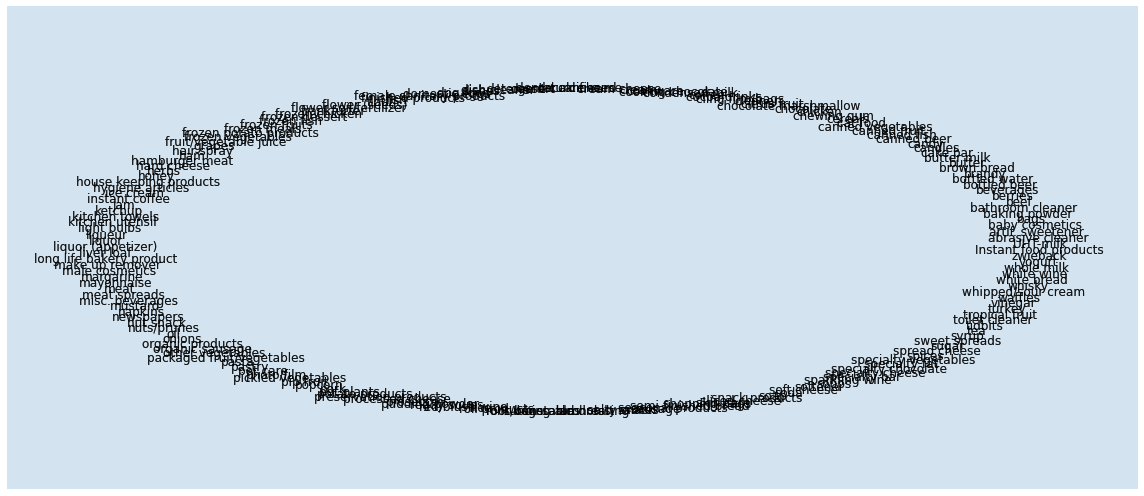

In [19]:
plt.figure(figsize =(16, 7)) 

G = nx.DiGraph()

for key in item_supp.keys():
    G.add_node(key)

for i in list(G.nodes()): 
    G.nodes[i]['support_count'] = item_supp[i]
     
node_size = [nx.get_node_attributes(G, 'support_count')[v] ** 5.5 for v in G] 
    
for key, val in src_dest_wght.items():
    G.add_edge(key[0], key[1], weight = val)

node_color = [G.degree(v) for v in G] 

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.7]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.7]

elarge_width = [5 * G[u][v]['weight'] for u, v in G.edges()] 
esmall_width = [3 * G[u][v]['weight'] for u, v in G.edges()] 

pos = nx.circular_layout(G)    

nx.draw_networkx(G, pos, edgelist = esmall, node_size = node_size, node_color = node_color, alpha = 0.7, 
                 with_labels = True, width = esmall_width, edge_color ='g', cmap = plt.cm.Blues, 
                 connectionstyle='arc3, rad = 0.1')

nx.draw_networkx(G, pos, edgelist = elarge, node_size = node_size, node_color = node_color, alpha = 0.7, 
                 with_labels = True, width = elarge_width, edge_color ='r', cmap = plt.cm.Blues, 
                 connectionstyle='arc3, rad = 0.2')  

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.3, font_size=10)

plt.axis('off') 
plt.tight_layout();